In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
from time import time
from tqdm import tqdm
from gensim.models.doc2vec import Doc2Vec
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import ColumnDataSource, Range1d, LabelSet, Label, HoverTool
from mpl_toolkits.mplot3d import Axes3D

In [4]:
df=pd.read_hdf('df.h5','table')

In [5]:
doc2vec_model = Doc2Vec.load('model/doc2vec/model_dv')
doc_vectors = KeyedVectors.load('model/doc2vec/dv_vectors')

In [6]:
dissim_=np.load('model/doc2vec/dissim_res.npy')

In [7]:
dissim=pd.DataFrame(data=dissim_)

In [8]:
dissim.columns=['product1', 'product2', 'dissimilarity']

In [9]:
dissim.sort_values('dissimilarity', ascending=False)[:10]

,product1,product2,dissimilarity
2228,5b013f384500d65c4d2fb59e,672365780,-0.8052822351455688
6090,5b0140584500d65c4d2fd208,5af8151e4500d65f249e5d27,-0.8026660680770874
5107,5b013fbe4500d65c4d2fc327,5af8151e4500d65f249e5d27,-0.7985658049583435
4688,5b013fad4500d65c4d2fc15c,5b013eeb4500d65c4d2fadd6,-0.7961053252220154
639,5b013eeb4500d65c4d2fadd6,5b013fad4500d65c4d2fc15c,-0.7961053252220154
8479,5b0140fb4500d65c4d2fe20a,5af8151e4500d65f249e5d27,-0.7950489521026611
6097,5b0140584500d65c4d2fd211,5af8151e4500d65f249e5d27,-0.7937483191490173
5381,5b0140134500d65c4d2fcb75,5af8151e4500d65f249e5d27,-0.7894191741943359
2894,5b013f5d4500d65c4d2fb979,672365780,-0.7840421199798584
7984,5b0140d94500d65c4d2fdee8,5af8177e4500d65f249e6cd0,-0.7828754782676697


In [10]:
dissim['dissimilarity']=dissim['dissimilarity'].apply(lambda row: float(row))

In [13]:
dissim_pairs=dissim
# dissim_pairs=dissim[dissim['dissimilarity']<(-0.5)]

In [16]:
unique_id=set(list(dissim_pairs['product1'].unique())+list(dissim_pairs['product2'].unique()))
len(unique_id)

11631

In [17]:
sample_desc = df['product_id'][df['product_id'].isin(unique_id)].apply(lambda row: doc2vec_model.docvecs[row])

In [18]:
x=np.vstack(sample_desc)
x.shape

(11632, 50)

手肘法find best cluster numbers

In [20]:
%%time
#sum of the squared errors
sse=[]
for k in range(1, 20):
    estimator=KMeans(n_clusters=k, verbose=True)
    estimator.fit(x)
    sse.append(estimator.inertia_)

Initialization complete
Iteration  0, inertia 89069.163
Iteration  1, inertia 58589.156
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.007378e-05
Initialization complete
Iteration  0, inertia 75805.206
Iteration  1, inertia 58589.156
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.007378e-05
Initialization complete
Iteration  0, inertia 102892.445
Iteration  1, inertia 58589.156
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.007378e-05
Initialization complete
Iteration  0, inertia 111547.314
Iteration  1, inertia 58589.156
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.007378e-05
Initialization complete
Iteration  0, inertia 143284.831
Iteration  1, inertia 58589.156
Converged at iteration 1: center shift 0.000000e+00 within tolerance 1.007378e-05
Initialization complete
Iteration  0, inertia 111304.152
Iteration  1, inertia 58589.156
Converged at iteration 1: center shift 0.000000e+00 within

Iteration 1, inertia 52878.293
start iteration
done sorting
end inner loop
Iteration 2, inertia 51576.484
start iteration
done sorting
end inner loop
Iteration 3, inertia 50749.586
start iteration
done sorting
end inner loop
Iteration 4, inertia 50513.125
start iteration
done sorting
end inner loop
Iteration 5, inertia 50465.645
start iteration
done sorting
end inner loop
Iteration 6, inertia 50456.082
start iteration
done sorting
end inner loop
Iteration 7, inertia 50453.895
start iteration
done sorting
end inner loop
Iteration 8, inertia 50453.234
start iteration
done sorting
end inner loop
Iteration 9, inertia 50452.996
start iteration
done sorting
end inner loop
Iteration 10, inertia 50452.938
center shift 2.814166e-03 within tolerance 1.007378e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 51703.594
start iteration
done sorting
end inner loop
Iteration 1, inertia 50704.64
start iteration
done sorting
end inner loop
Iteration 2, inertia

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 49044.656
start iteration
done sorting
end inner loop
Iteration 1, inertia 47171.3
start iteration
done sorting
end inner loop
Iteration 2, inertia 46866.96
start iteration
done sorting
end inner loop
Iteration 3, inertia 46806.973
start iteration
done sorting
end inner loop
Iteration 4, inertia 46783.527
start iteration
done sorting
end inner loop
Iteration 5, inertia 46773.2
start iteration
done sorting
end inner loop
Iteration 6, inertia 46767.094
start iteration
done sorting
end inner loop
Iteration 7, inertia 46763.13
start iteration
done sorting
end inner loop
Iteration 8, inertia 46761.082
start iteration
done sorting
end inner loop
Iteration 9, inertia 46759.586
start iteration
done sorting
end inner loop
Iteration 10, inertia 46759.047
start iteration
done sorting
end inner loop
Iteration 11, inertia 46758.508
start iteration
done sorting
end inner loop
Iteration 12, inertia 46758.125
star

end inner loop
Iteration 6, inertia 46803.508
start iteration
done sorting
end inner loop
Iteration 7, inertia 46791.617
start iteration
done sorting
end inner loop
Iteration 8, inertia 46784.047
start iteration
done sorting
end inner loop
Iteration 9, inertia 46778.188
start iteration
done sorting
end inner loop
Iteration 10, inertia 46771.863
start iteration
done sorting
end inner loop
Iteration 11, inertia 46767.312
start iteration
done sorting
end inner loop
Iteration 12, inertia 46764.934
start iteration
done sorting
end inner loop
Iteration 13, inertia 46762.617
start iteration
done sorting
end inner loop
Iteration 14, inertia 46760.367
start iteration
done sorting
end inner loop
Iteration 15, inertia 46759.137
start iteration
done sorting
end inner loop
Iteration 16, inertia 46758.355
start iteration
done sorting
end inner loop
Iteration 17, inertia 46757.984
start iteration
done sorting
end inner loop
Iteration 18, inertia 46757.824
start iteration
done sorting
end inner loop
I

Iteration 3, inertia 44936.4
start iteration
done sorting
end inner loop
Iteration 4, inertia 44773.133
start iteration
done sorting
end inner loop
Iteration 5, inertia 44698.35
start iteration
done sorting
end inner loop
Iteration 6, inertia 44640.793
start iteration
done sorting
end inner loop
Iteration 7, inertia 44586.863
start iteration
done sorting
end inner loop
Iteration 8, inertia 44533.387
start iteration
done sorting
end inner loop
Iteration 9, inertia 44483.152
start iteration
done sorting
end inner loop
Iteration 10, inertia 44436.34
start iteration
done sorting
end inner loop
Iteration 11, inertia 44394.453
start iteration
done sorting
end inner loop
Iteration 12, inertia 44355.125
start iteration
done sorting
end inner loop
Iteration 13, inertia 44327.668
start iteration
done sorting
end inner loop
Iteration 14, inertia 44307.652
start iteration
done sorting
end inner loop
Iteration 15, inertia 44295.34
start iteration
done sorting
end inner loop
Iteration 16, inertia 44

Iteration 12, inertia 42752.92
start iteration
done sorting
end inner loop
Iteration 13, inertia 42737.543
start iteration
done sorting
end inner loop
Iteration 14, inertia 42730.008
start iteration
done sorting
end inner loop
Iteration 15, inertia 42726.97
start iteration
done sorting
end inner loop
Iteration 16, inertia 42725.69
start iteration
done sorting
end inner loop
Iteration 17, inertia 42724.934
start iteration
done sorting
end inner loop
Iteration 18, inertia 42724.453
start iteration
done sorting
end inner loop
Iteration 19, inertia 42724.297
start iteration
done sorting
end inner loop
Iteration 20, inertia 42724.24
start iteration
done sorting
end inner loop
Iteration 21, inertia 42724.246
center shift 1.292296e-03 within tolerance 1.007378e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 44876.08
start iteration
done sorting
end inner loop
Iteration 1, inertia 42951.2
start iteration
done sorting
end inner loop
Iteration 2, iner

start iteration
done sorting
end inner loop
Iteration 0, inertia 44706.062
start iteration
done sorting
end inner loop
Iteration 1, inertia 42093.28
start iteration
done sorting
end inner loop
Iteration 2, inertia 41713.574
start iteration
done sorting
end inner loop
Iteration 3, inertia 41599.23
start iteration
done sorting
end inner loop
Iteration 4, inertia 41532.492
start iteration
done sorting
end inner loop
Iteration 5, inertia 41477.684
start iteration
done sorting
end inner loop
Iteration 6, inertia 41440.914
start iteration
done sorting
end inner loop
Iteration 7, inertia 41413.39
start iteration
done sorting
end inner loop
Iteration 8, inertia 41393.477
start iteration
done sorting
end inner loop
Iteration 9, inertia 41372.613
start iteration
done sorting
end inner loop
Iteration 10, inertia 41352.383
start iteration
done sorting
end inner loop
Iteration 11, inertia 41328.78
start iteration
done sorting
end inner loop
Iteration 12, inertia 41295.496
start iteration
done sorti

end inner loop
Iteration 1, inertia 43364.39
start iteration
done sorting
end inner loop
Iteration 2, inertia 41378.113
start iteration
done sorting
end inner loop
Iteration 3, inertia 40918.62
start iteration
done sorting
end inner loop
Iteration 4, inertia 40751.15
start iteration
done sorting
end inner loop
Iteration 5, inertia 40694.016
start iteration
done sorting
end inner loop
Iteration 6, inertia 40671.91
start iteration
done sorting
end inner loop
Iteration 7, inertia 40663.12
start iteration
done sorting
end inner loop
Iteration 8, inertia 40659.594
start iteration
done sorting
end inner loop
Iteration 9, inertia 40657.664
start iteration
done sorting
end inner loop
Iteration 10, inertia 40656.55
start iteration
done sorting
end inner loop
Iteration 11, inertia 40656.2
start iteration
done sorting
end inner loop
Iteration 12, inertia 40655.87
start iteration
done sorting
end inner loop
Iteration 13, inertia 40655.645
start iteration
done sorting
end inner loop
Iteration 14, i

Iteration 14, inertia 41080.75
start iteration
done sorting
end inner loop
Iteration 15, inertia 41076.99
start iteration
done sorting
end inner loop
Iteration 16, inertia 41073.938
start iteration
done sorting
end inner loop
Iteration 17, inertia 41073.004
start iteration
done sorting
end inner loop
Iteration 18, inertia 41072.547
start iteration
done sorting
end inner loop
Iteration 19, inertia 41072.32
start iteration
done sorting
end inner loop
Iteration 20, inertia 41072.234
start iteration
done sorting
end inner loop
Iteration 21, inertia 41072.156
start iteration
done sorting
end inner loop
Iteration 22, inertia 41071.992
start iteration
done sorting
end inner loop
Iteration 23, inertia 41071.9
start iteration
done sorting
end inner loop
Iteration 24, inertia 41071.785
start iteration
done sorting
end inner loop
Iteration 25, inertia 41071.67
start iteration
done sorting
end inner loop
Iteration 26, inertia 41071.57
start iteration
done sorting
end inner loop
Iteration 27, inert

Iteration 25, inertia 39075.383
start iteration
done sorting
end inner loop
Iteration 26, inertia 39075.03
start iteration
done sorting
end inner loop
Iteration 27, inertia 39074.797
start iteration
done sorting
end inner loop
Iteration 28, inertia 39074.664
start iteration
done sorting
end inner loop
Iteration 29, inertia 39074.566
start iteration
done sorting
end inner loop
Iteration 30, inertia 39074.484
start iteration
done sorting
end inner loop
Iteration 31, inertia 39074.42
start iteration
done sorting
end inner loop
Iteration 32, inertia 39074.38
start iteration
done sorting
end inner loop
Iteration 33, inertia 39074.297
start iteration
done sorting
end inner loop
Iteration 34, inertia 39074.195
start iteration
done sorting
end inner loop
Iteration 35, inertia 39074.027
start iteration
done sorting
end inner loop
Iteration 36, inertia 39073.94
start iteration
done sorting
end inner loop
Iteration 37, inertia 39073.816
start iteration
done sorting
end inner loop
Iteration 38, in

end inner loop
Iteration 1, inertia 43766.85
start iteration
done sorting
end inner loop
Iteration 2, inertia 42624.51
start iteration
done sorting
end inner loop
Iteration 3, inertia 41684.31
start iteration
done sorting
end inner loop
Iteration 4, inertia 40959.746
start iteration
done sorting
end inner loop
Iteration 5, inertia 40101.297
start iteration
done sorting
end inner loop
Iteration 6, inertia 39661.637
start iteration
done sorting
end inner loop
Iteration 7, inertia 39536.46
start iteration
done sorting
end inner loop
Iteration 8, inertia 39495.67
start iteration
done sorting
end inner loop
Iteration 9, inertia 39481.445
start iteration
done sorting
end inner loop
Iteration 10, inertia 39476.56
start iteration
done sorting
end inner loop
Iteration 11, inertia 39474.06
start iteration
done sorting
end inner loop
Iteration 12, inertia 39471.906
start iteration
done sorting
end inner loop
Iteration 13, inertia 39470.637
start iteration
done sorting
end inner loop
Iteration 14,

Iteration 5, inertia 39097.176
start iteration
done sorting
end inner loop
Iteration 6, inertia 39086.2
start iteration
done sorting
end inner loop
Iteration 7, inertia 39079.4
start iteration
done sorting
end inner loop
Iteration 8, inertia 39075.95
start iteration
done sorting
end inner loop
Iteration 9, inertia 39074.484
start iteration
done sorting
end inner loop
Iteration 10, inertia 39073.96
start iteration
done sorting
end inner loop
Iteration 11, inertia 39073.664
start iteration
done sorting
end inner loop
Iteration 12, inertia 39073.496
start iteration
done sorting
end inner loop
Iteration 13, inertia 39073.39
start iteration
done sorting
end inner loop
Iteration 14, inertia 39073.344
start iteration
done sorting
end inner loop
Iteration 15, inertia 39073.297
start iteration
done sorting
end inner loop
Iteration 16, inertia 39073.273
start iteration
done sorting
end inner loop
Iteration 17, inertia 39073.266
center shift 2.144722e-03 within tolerance 1.007378e-05
Initializati

Iteration 30, inertia 38073.0
start iteration
done sorting
end inner loop
Iteration 31, inertia 38072.945
start iteration
done sorting
end inner loop
Iteration 32, inertia 38072.91
start iteration
done sorting
end inner loop
Iteration 33, inertia 38072.883
start iteration
done sorting
end inner loop
Iteration 34, inertia 38072.87
center shift 1.901149e-03 within tolerance 1.007378e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 42967.727
start iteration
done sorting
end inner loop
Iteration 1, inertia 39931.547
start iteration
done sorting
end inner loop
Iteration 2, inertia 39070.195
start iteration
done sorting
end inner loop
Iteration 3, inertia 38721.426
start iteration
done sorting
end inner loop
Iteration 4, inertia 38569.49
start iteration
done sorting
end inner loop
Iteration 5, inertia 38471.832
start iteration
done sorting
end inner loop
Iteration 6, inertia 38397.06
start iteration
done sorting
end inner loop
Iteration 7, inertia 

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 41834.3
start iteration
done sorting
end inner loop
Iteration 1, inertia 39372.234
start iteration
done sorting
end inner loop
Iteration 2, inertia 38940.703
start iteration
done sorting
end inner loop
Iteration 3, inertia 38747.48
start iteration
done sorting
end inner loop
Iteration 4, inertia 38597.836
start iteration
done sorting
end inner loop
Iteration 5, inertia 38444.86
start iteration
done sorting
end inner loop
Iteration 6, inertia 38338.71
start iteration
done sorting
end inner loop
Iteration 7, inertia 38277.234
start iteration
done sorting
end inner loop
Iteration 8, inertia 38238.13
start iteration
done sorting
end inner loop
Iteration 9, inertia 38210.457
start iteration
done sorting
end inner loop
Iteration 10, inertia 38189.527
start iteration
done sorting
end inner loop
Iteration 11, inertia 38167.586
start iteration
done sorting
end inner loop
Iteration 12, inertia 38146.004
star

Iteration 14, inertia 37615.902
start iteration
done sorting
end inner loop
Iteration 15, inertia 37611.85
start iteration
done sorting
end inner loop
Iteration 16, inertia 37608.867
start iteration
done sorting
end inner loop
Iteration 17, inertia 37607.023
start iteration
done sorting
end inner loop
Iteration 18, inertia 37605.316
start iteration
done sorting
end inner loop
Iteration 19, inertia 37603.98
start iteration
done sorting
end inner loop
Iteration 20, inertia 37602.89
start iteration
done sorting
end inner loop
Iteration 21, inertia 37602.07
start iteration
done sorting
end inner loop
Iteration 22, inertia 37601.266
start iteration
done sorting
end inner loop
Iteration 23, inertia 37600.273
start iteration
done sorting
end inner loop
Iteration 24, inertia 37598.895
start iteration
done sorting
end inner loop
Iteration 25, inertia 37597.438
start iteration
done sorting
end inner loop
Iteration 26, inertia 37595.86
start iteration
done sorting
end inner loop
Iteration 27, ine

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 40982.156
start iteration
done sorting
end inner loop
Iteration 1, inertia 38572.08
start iteration
done sorting
end inner loop
Iteration 2, inertia 38185.75
start iteration
done sorting
end inner loop
Iteration 3, inertia 38023.258
start iteration
done sorting
end inner loop
Iteration 4, inertia 37898.625
start iteration
done sorting
end inner loop
Iteration 5, inertia 37795.945
start iteration
done sorting
end inner loop
Iteration 6, inertia 37724.12
start iteration
done sorting
end inner loop
Iteration 7, inertia 37673.83
start iteration
done sorting
end inner loop
Iteration 8, inertia 37641.082
start iteration
done sorting
end inner loop
Iteration 9, inertia 37620.4
start iteration
done sorting
end inner loop
Iteration 10, inertia 37603.766
start iteration
done sorting
end inner loop
Iteration 11, inertia 37591.45
start iteration
done sorting
end inner loop
Iteration 12, inertia 37584.098
start

Iteration 13, inertia 36944.895
start iteration
done sorting
end inner loop
Iteration 14, inertia 36943.973
start iteration
done sorting
end inner loop
Iteration 15, inertia 36943.305
start iteration
done sorting
end inner loop
Iteration 16, inertia 36942.855
start iteration
done sorting
end inner loop
Iteration 17, inertia 36942.598
start iteration
done sorting
end inner loop
Iteration 18, inertia 36942.453
start iteration
done sorting
end inner loop
Iteration 19, inertia 36942.324
start iteration
done sorting
end inner loop
Iteration 20, inertia 36942.28
start iteration
done sorting
end inner loop
Iteration 21, inertia 36942.28
center shift 1.869393e-03 within tolerance 1.007378e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 43609.266
start iteration
done sorting
end inner loop
Iteration 1, inertia 41577.87
start iteration
done sorting
end inner loop
Iteration 2, inertia 40716.555
start iteration
done sorting
end inner loop
Iteration 3, i

end inner loop
Iteration 1, inertia 37328.535
start iteration
done sorting
end inner loop
Iteration 2, inertia 36827.02
start iteration
done sorting
end inner loop
Iteration 3, inertia 36683.83
start iteration
done sorting
end inner loop
Iteration 4, inertia 36618.19
start iteration
done sorting
end inner loop
Iteration 5, inertia 36571.953
start iteration
done sorting
end inner loop
Iteration 6, inertia 36543.746
start iteration
done sorting
end inner loop
Iteration 7, inertia 36526.195
start iteration
done sorting
end inner loop
Iteration 8, inertia 36513.504
start iteration
done sorting
end inner loop
Iteration 9, inertia 36502.625
start iteration
done sorting
end inner loop
Iteration 10, inertia 36492.715
start iteration
done sorting
end inner loop
Iteration 11, inertia 36484.59
start iteration
done sorting
end inner loop
Iteration 12, inertia 36479.33
start iteration
done sorting
end inner loop
Iteration 13, inertia 36474.36
start iteration
done sorting
end inner loop
Iteration 14

Iteration 13, inertia 36510.957
start iteration
done sorting
end inner loop
Iteration 14, inertia 36506.85
start iteration
done sorting
end inner loop
Iteration 15, inertia 36502.723
start iteration
done sorting
end inner loop
Iteration 16, inertia 36499.152
start iteration
done sorting
end inner loop
Iteration 17, inertia 36495.15
start iteration
done sorting
end inner loop
Iteration 18, inertia 36490.188
start iteration
done sorting
end inner loop
Iteration 19, inertia 36485.617
start iteration
done sorting
end inner loop
Iteration 20, inertia 36482.668
start iteration
done sorting
end inner loop
Iteration 21, inertia 36479.72
start iteration
done sorting
end inner loop
Iteration 22, inertia 36477.06
start iteration
done sorting
end inner loop
Iteration 23, inertia 36474.316
start iteration
done sorting
end inner loop
Iteration 24, inertia 36471.25
start iteration
done sorting
end inner loop
Iteration 25, inertia 36468.7
start iteration
done sorting
end inner loop
Iteration 26, inert

Iteration 18, inertia 36470.777
start iteration
done sorting
end inner loop
Iteration 19, inertia 36466.234
start iteration
done sorting
end inner loop
Iteration 20, inertia 36462.88
start iteration
done sorting
end inner loop
Iteration 21, inertia 36461.383
start iteration
done sorting
end inner loop
Iteration 22, inertia 36460.566
start iteration
done sorting
end inner loop
Iteration 23, inertia 36460.26
start iteration
done sorting
end inner loop
Iteration 24, inertia 36460.11
start iteration
done sorting
end inner loop
Iteration 25, inertia 36459.97
start iteration
done sorting
end inner loop
Iteration 26, inertia 36459.863
start iteration
done sorting
end inner loop
Iteration 27, inertia 36459.832
start iteration
done sorting
end inner loop
Iteration 28, inertia 36459.746
start iteration
done sorting
end inner loop
Iteration 29, inertia 36459.62
start iteration
done sorting
end inner loop
Iteration 30, inertia 36459.562
start iteration
done sorting
end inner loop
Iteration 31, ine

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 40722.652
start iteration
done sorting
end inner loop
Iteration 1, inertia 37890.34
start iteration
done sorting
end inner loop
Iteration 2, inertia 37301.79
start iteration
done sorting
end inner loop
Iteration 3, inertia 36962.92
start iteration
done sorting
end inner loop
Iteration 4, inertia 36656.152
start iteration
done sorting
end inner loop
Iteration 5, inertia 36427.656
start iteration
done sorting
end inner loop
Iteration 6, inertia 36296.973
start iteration
done sorting
end inner loop
Iteration 7, inertia 36217.18
start iteration
done sorting
end inner loop
Iteration 8, inertia 36182.246
start iteration
done sorting
end inner loop
Iteration 9, inertia 36160.082
start iteration
done sorting
end inner loop
Iteration 10, inertia 36147.688
start iteration
done sorting
end inner loop
Iteration 11, inertia 36139.188
start iteration
done sorting
end inner loop
Iteration 12, inertia 36133.094
st

done sorting
end inner loop
Iteration 27, inertia 36064.996
start iteration
done sorting
end inner loop
Iteration 28, inertia 36061.336
start iteration
done sorting
end inner loop
Iteration 29, inertia 36058.074
start iteration
done sorting
end inner loop
Iteration 30, inertia 36055.332
start iteration
done sorting
end inner loop
Iteration 31, inertia 36053.797
start iteration
done sorting
end inner loop
Iteration 32, inertia 36052.887
start iteration
done sorting
end inner loop
Iteration 33, inertia 36052.02
start iteration
done sorting
end inner loop
Iteration 34, inertia 36051.457
start iteration
done sorting
end inner loop
Iteration 35, inertia 36050.945
start iteration
done sorting
end inner loop
Iteration 36, inertia 36050.47
start iteration
done sorting
end inner loop
Iteration 37, inertia 36049.754
start iteration
done sorting
end inner loop
Iteration 38, inertia 36049.008
start iteration
done sorting
end inner loop
Iteration 39, inertia 36048.465
start iteration
done sorting
e

Iteration 30, inertia 35953.203
start iteration
done sorting
end inner loop
Iteration 31, inertia 35952.68
start iteration
done sorting
end inner loop
Iteration 32, inertia 35951.8
start iteration
done sorting
end inner loop
Iteration 33, inertia 35950.92
start iteration
done sorting
end inner loop
Iteration 34, inertia 35950.28
start iteration
done sorting
end inner loop
Iteration 35, inertia 35949.637
start iteration
done sorting
end inner loop
Iteration 36, inertia 35948.67
start iteration
done sorting
end inner loop
Iteration 37, inertia 35947.746
start iteration
done sorting
end inner loop
Iteration 38, inertia 35946.906
start iteration
done sorting
end inner loop
Iteration 39, inertia 35946.516
start iteration
done sorting
end inner loop
Iteration 40, inertia 35946.152
start iteration
done sorting
end inner loop
Iteration 41, inertia 35945.844
start iteration
done sorting
end inner loop
Iteration 42, inertia 35945.6
start iteration
done sorting
end inner loop
Iteration 43, inerti

Iteration 40, inertia 35823.336
start iteration
done sorting
end inner loop
Iteration 41, inertia 35823.312
start iteration
done sorting
end inner loop
Iteration 42, inertia 35823.312
center shift 1.736678e-03 within tolerance 1.007378e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 40243.203
start iteration
done sorting
end inner loop
Iteration 1, inertia 36644.4
start iteration
done sorting
end inner loop
Iteration 2, inertia 35671.066
start iteration
done sorting
end inner loop
Iteration 3, inertia 35384.06
start iteration
done sorting
end inner loop
Iteration 4, inertia 35292.027
start iteration
done sorting
end inner loop
Iteration 5, inertia 35244.414
start iteration
done sorting
end inner loop
Iteration 6, inertia 35221.094
start iteration
done sorting
end inner loop
Iteration 7, inertia 35206.992
start iteration
done sorting
end inner loop
Iteration 8, inertia 35195.516
start iteration
done sorting
end inner loop
Iteration 9, inertia

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 39694.34
start iteration
done sorting
end inner loop
Iteration 1, inertia 37596.15
start iteration
done sorting
end inner loop
Iteration 2, inertia 36779.867
start iteration
done sorting
end inner loop
Iteration 3, inertia 35988.797
start iteration
done sorting
end inner loop
Iteration 4, inertia 35744.746
start iteration
done sorting
end inner loop
Iteration 5, inertia 35676.777
start iteration
done sorting
end inner loop
Iteration 6, inertia 35640.76
start iteration
done sorting
end inner loop
Iteration 7, inertia 35621.29
start iteration
done sorting
end inner loop
Iteration 8, inertia 35611.938
start iteration
done sorting
end inner loop
Iteration 9, inertia 35606.004
start iteration
done sorting
end inner loop
Iteration 10, inertia 35602.05
start iteration
done sorting
end inner loop
Iteration 11, inertia 35599.152
start iteration
done sorting
end inner loop
Iteration 12, inertia 35596.63
star

Iteration 3, inertia 36463.773
start iteration
done sorting
end inner loop
Iteration 4, inertia 36018.28
start iteration
done sorting
end inner loop
Iteration 5, inertia 35771.92
start iteration
done sorting
end inner loop
Iteration 6, inertia 35661.457
start iteration
done sorting
end inner loop
Iteration 7, inertia 35593.73
start iteration
done sorting
end inner loop
Iteration 8, inertia 35559.215
start iteration
done sorting
end inner loop
Iteration 9, inertia 35534.582
start iteration
done sorting
end inner loop
Iteration 10, inertia 35519.703
start iteration
done sorting
end inner loop
Iteration 11, inertia 35510.54
start iteration
done sorting
end inner loop
Iteration 12, inertia 35504.74
start iteration
done sorting
end inner loop
Iteration 13, inertia 35500.46
start iteration
done sorting
end inner loop
Iteration 14, inertia 35496.22
start iteration
done sorting
end inner loop
Iteration 15, inertia 35492.74
start iteration
done sorting
end inner loop
Iteration 16, inertia 35488

done sorting
end inner loop
Iteration 6, inertia 35753.516
start iteration
done sorting
end inner loop
Iteration 7, inertia 35743.14
start iteration
done sorting
end inner loop
Iteration 8, inertia 35735.85
start iteration
done sorting
end inner loop
Iteration 9, inertia 35731.004
start iteration
done sorting
end inner loop
Iteration 10, inertia 35726.535
start iteration
done sorting
end inner loop
Iteration 11, inertia 35722.664
start iteration
done sorting
end inner loop
Iteration 12, inertia 35719.03
start iteration
done sorting
end inner loop
Iteration 13, inertia 35716.562
start iteration
done sorting
end inner loop
Iteration 14, inertia 35714.72
start iteration
done sorting
end inner loop
Iteration 15, inertia 35713.266
start iteration
done sorting
end inner loop
Iteration 16, inertia 35712.555
start iteration
done sorting
end inner loop
Iteration 17, inertia 35712.035
start iteration
done sorting
end inner loop
Iteration 18, inertia 35711.633
start iteration
done sorting
end inn

Iteration 4, inertia 35231.324
start iteration
done sorting
end inner loop
Iteration 5, inertia 35075.023
start iteration
done sorting
end inner loop
Iteration 6, inertia 34963.586
start iteration
done sorting
end inner loop
Iteration 7, inertia 34877.824
start iteration
done sorting
end inner loop
Iteration 8, inertia 34825.902
start iteration
done sorting
end inner loop
Iteration 9, inertia 34800.74
start iteration
done sorting
end inner loop
Iteration 10, inertia 34783.04
start iteration
done sorting
end inner loop
Iteration 11, inertia 34767.793
start iteration
done sorting
end inner loop
Iteration 12, inertia 34754.535
start iteration
done sorting
end inner loop
Iteration 13, inertia 34741.22
start iteration
done sorting
end inner loop
Iteration 14, inertia 34733.723
start iteration
done sorting
end inner loop
Iteration 15, inertia 34728.395
start iteration
done sorting
end inner loop
Iteration 16, inertia 34724.98
start iteration
done sorting
end inner loop
Iteration 17, inertia 

Iteration 13, inertia 34992.98
start iteration
done sorting
end inner loop
Iteration 14, inertia 34981.047
start iteration
done sorting
end inner loop
Iteration 15, inertia 34967.293
start iteration
done sorting
end inner loop
Iteration 16, inertia 34944.53
start iteration
done sorting
end inner loop
Iteration 17, inertia 34905.777
start iteration
done sorting
end inner loop
Iteration 18, inertia 34879.773
start iteration
done sorting
end inner loop
Iteration 19, inertia 34871.19
start iteration
done sorting
end inner loop
Iteration 20, inertia 34869.68
start iteration
done sorting
end inner loop
Iteration 21, inertia 34869.09
start iteration
done sorting
end inner loop
Iteration 22, inertia 34868.984
start iteration
done sorting
end inner loop
Iteration 23, inertia 34868.887
start iteration
done sorting
end inner loop
Iteration 24, inertia 34868.867
start iteration
done sorting
end inner loop
Iteration 25, inertia 34868.85
start iteration
done sorting
end inner loop
Iteration 26, iner

Iteration 43, inertia 34903.984
start iteration
done sorting
end inner loop
Iteration 44, inertia 34903.957
start iteration
done sorting
end inner loop
Iteration 45, inertia 34903.934
start iteration
done sorting
end inner loop
Iteration 46, inertia 34903.887
start iteration
done sorting
end inner loop
Iteration 47, inertia 34903.85
start iteration
done sorting
end inner loop
Iteration 48, inertia 34903.793
start iteration
done sorting
end inner loop
Iteration 49, inertia 34903.766
start iteration
done sorting
end inner loop
Iteration 50, inertia 34903.7
start iteration
done sorting
end inner loop
Iteration 51, inertia 34903.65
start iteration
done sorting
end inner loop
Iteration 52, inertia 34903.594
start iteration
done sorting
end inner loop
Iteration 53, inertia 34903.52
start iteration
done sorting
end inner loop
Iteration 54, inertia 34903.52
center shift 2.389137e-03 within tolerance 1.007378e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, i

Iteration 28, inertia 34882.797
start iteration
done sorting
end inner loop
Iteration 29, inertia 34878.727
start iteration
done sorting
end inner loop
Iteration 30, inertia 34875.51
start iteration
done sorting
end inner loop
Iteration 31, inertia 34873.32
start iteration
done sorting
end inner loop
Iteration 32, inertia 34871.676
start iteration
done sorting
end inner loop
Iteration 33, inertia 34870.938
start iteration
done sorting
end inner loop
Iteration 34, inertia 34870.46
start iteration
done sorting
end inner loop
Iteration 35, inertia 34870.05
start iteration
done sorting
end inner loop
Iteration 36, inertia 34869.6
start iteration
done sorting
end inner loop
Iteration 37, inertia 34869.08
start iteration
done sorting
end inner loop
Iteration 38, inertia 34868.594
start iteration
done sorting
end inner loop
Iteration 39, inertia 34868.05
start iteration
done sorting
end inner loop
Iteration 40, inertia 34867.19
start iteration
done sorting
end inner loop
Iteration 41, inertia

start iteration
done sorting
end inner loop
Iteration 0, inertia 37707.82
start iteration
done sorting
end inner loop
Iteration 1, inertia 35745.074
start iteration
done sorting
end inner loop
Iteration 2, inertia 35239.2
start iteration
done sorting
end inner loop
Iteration 3, inertia 34824.824
start iteration
done sorting
end inner loop
Iteration 4, inertia 34698.95
start iteration
done sorting
end inner loop
Iteration 5, inertia 34667.977
start iteration
done sorting
end inner loop
Iteration 6, inertia 34653.137
start iteration
done sorting
end inner loop
Iteration 7, inertia 34640.273
start iteration
done sorting
end inner loop
Iteration 8, inertia 34631.484
start iteration
done sorting
end inner loop
Iteration 9, inertia 34624.766
start iteration
done sorting
end inner loop
Iteration 10, inertia 34618.17
start iteration
done sorting
end inner loop
Iteration 11, inertia 34610.0
start iteration
done sorting
end inner loop
Iteration 12, inertia 34600.277
start iteration
done sorting


done sorting
end inner loop
Iteration 62, inertia 34134.95
start iteration
done sorting
end inner loop
Iteration 63, inertia 34134.844
start iteration
done sorting
end inner loop
Iteration 64, inertia 34134.645
start iteration
done sorting
end inner loop
Iteration 65, inertia 34134.312
start iteration
done sorting
end inner loop
Iteration 66, inertia 34133.832
start iteration
done sorting
end inner loop
Iteration 67, inertia 34133.535
start iteration
done sorting
end inner loop
Iteration 68, inertia 34133.367
start iteration
done sorting
end inner loop
Iteration 69, inertia 34133.137
start iteration
done sorting
end inner loop
Iteration 70, inertia 34133.023
start iteration
done sorting
end inner loop
Iteration 71, inertia 34132.957
start iteration
done sorting
end inner loop
Iteration 72, inertia 34132.926
start iteration
done sorting
end inner loop
Iteration 73, inertia 34132.855
start iteration
done sorting
end inner loop
Iteration 74, inertia 34132.723
start iteration
done sorting


done sorting
end inner loop
Iteration 27, inertia 34159.945
start iteration
done sorting
end inner loop
Iteration 28, inertia 34158.043
start iteration
done sorting
end inner loop
Iteration 29, inertia 34156.996
start iteration
done sorting
end inner loop
Iteration 30, inertia 34155.91
start iteration
done sorting
end inner loop
Iteration 31, inertia 34154.84
start iteration
done sorting
end inner loop
Iteration 32, inertia 34154.176
start iteration
done sorting
end inner loop
Iteration 33, inertia 34153.69
start iteration
done sorting
end inner loop
Iteration 34, inertia 34153.105
start iteration
done sorting
end inner loop
Iteration 35, inertia 34152.77
start iteration
done sorting
end inner loop
Iteration 36, inertia 34152.41
start iteration
done sorting
end inner loop
Iteration 37, inertia 34152.19
start iteration
done sorting
end inner loop
Iteration 38, inertia 34152.01
start iteration
done sorting
end inner loop
Iteration 39, inertia 34151.8
start iteration
done sorting
end inne

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 39337.098
start iteration
done sorting
end inner loop
Iteration 1, inertia 36100.547
start iteration
done sorting
end inner loop
Iteration 2, inertia 35261.773
start iteration
done sorting
end inner loop
Iteration 3, inertia 35026.793
start iteration
done sorting
end inner loop
Iteration 4, inertia 34939.703
start iteration
done sorting
end inner loop
Iteration 5, inertia 34899.902
start iteration
done sorting
end inner loop
Iteration 6, inertia 34874.73
start iteration
done sorting
end inner loop
Iteration 7, inertia 34850.27
start iteration
done sorting
end inner loop
Iteration 8, inertia 34821.78
start iteration
done sorting
end inner loop
Iteration 9, inertia 34786.47
start iteration
done sorting
end inner loop
Iteration 10, inertia 34748.47
start iteration
done sorting
end inner loop
Iteration 11, inertia 34714.22
start iteration
done sorting
end inner loop
Iteration 12, inertia 34686.93
start

Iteration 7, inertia 34139.176
start iteration
done sorting
end inner loop
Iteration 8, inertia 34101.9
start iteration
done sorting
end inner loop
Iteration 9, inertia 34074.95
start iteration
done sorting
end inner loop
Iteration 10, inertia 34060.188
start iteration
done sorting
end inner loop
Iteration 11, inertia 34048.977
start iteration
done sorting
end inner loop
Iteration 12, inertia 34034.34
start iteration
done sorting
end inner loop
Iteration 13, inertia 34016.324
start iteration
done sorting
end inner loop
Iteration 14, inertia 33997.664
start iteration
done sorting
end inner loop
Iteration 15, inertia 33976.098
start iteration
done sorting
end inner loop
Iteration 16, inertia 33950.656
start iteration
done sorting
end inner loop
Iteration 17, inertia 33928.76
start iteration
done sorting
end inner loop
Iteration 18, inertia 33906.633
start iteration
done sorting
end inner loop
Iteration 19, inertia 33890.293
start iteration
done sorting
end inner loop
Iteration 20, inerti

Iteration 31, inertia 34251.844
start iteration
done sorting
end inner loop
Iteration 32, inertia 34251.77
start iteration
done sorting
end inner loop
Iteration 33, inertia 34251.625
start iteration
done sorting
end inner loop
Iteration 34, inertia 34251.57
start iteration
done sorting
end inner loop
Iteration 35, inertia 34251.46
start iteration
done sorting
end inner loop
Iteration 36, inertia 34251.355
start iteration
done sorting
end inner loop
Iteration 37, inertia 34251.277
start iteration
done sorting
end inner loop
Iteration 38, inertia 34251.23
start iteration
done sorting
end inner loop
Iteration 39, inertia 34251.17
start iteration
done sorting
end inner loop
Iteration 40, inertia 34251.1
start iteration
done sorting
end inner loop
Iteration 41, inertia 34251.03
start iteration
done sorting
end inner loop
Iteration 42, inertia 34250.977
start iteration
done sorting
end inner loop
Iteration 43, inertia 34250.887
start iteration
done sorting
end inner loop
Iteration 44, inerti

Iteration 63, inertia 34730.594
start iteration
done sorting
end inner loop
Iteration 64, inertia 34730.12
start iteration
done sorting
end inner loop
Iteration 65, inertia 34729.96
start iteration
done sorting
end inner loop
Iteration 66, inertia 34729.8
start iteration
done sorting
end inner loop
Iteration 67, inertia 34729.688
start iteration
done sorting
end inner loop
Iteration 68, inertia 34729.633
start iteration
done sorting
end inner loop
Iteration 69, inertia 34729.566
start iteration
done sorting
end inner loop
Iteration 70, inertia 34729.41
start iteration
done sorting
end inner loop
Iteration 71, inertia 34729.277
start iteration
done sorting
end inner loop
Iteration 72, inertia 34729.215
start iteration
done sorting
end inner loop
Iteration 73, inertia 34729.195
start iteration
done sorting
end inner loop
Iteration 74, inertia 34729.18
start iteration
done sorting
end inner loop
Iteration 75, inertia 34729.176
start iteration
done sorting
end inner loop
Iteration 76, iner

Iteration 14, inertia 34221.035
start iteration
done sorting
end inner loop
Iteration 15, inertia 34219.008
start iteration
done sorting
end inner loop
Iteration 16, inertia 34217.367
start iteration
done sorting
end inner loop
Iteration 17, inertia 34216.312
start iteration
done sorting
end inner loop
Iteration 18, inertia 34215.117
start iteration
done sorting
end inner loop
Iteration 19, inertia 34214.375
start iteration
done sorting
end inner loop
Iteration 20, inertia 34213.457
start iteration
done sorting
end inner loop
Iteration 21, inertia 34211.87
start iteration
done sorting
end inner loop
Iteration 22, inertia 34209.656
start iteration
done sorting
end inner loop
Iteration 23, inertia 34205.977
start iteration
done sorting
end inner loop
Iteration 24, inertia 34200.473
start iteration
done sorting
end inner loop
Iteration 25, inertia 34194.555
start iteration
done sorting
end inner loop
Iteration 26, inertia 34186.9
start iteration
done sorting
end inner loop
Iteration 27, i

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 38099.03
start iteration
done sorting
end inner loop
Iteration 1, inertia 35250.773
start iteration
done sorting
end inner loop
Iteration 2, inertia 34507.266
start iteration
done sorting
end inner loop
Iteration 3, inertia 34123.496
start iteration
done sorting
end inner loop
Iteration 4, inertia 33943.535
start iteration
done sorting
end inner loop
Iteration 5, inertia 33823.64
start iteration
done sorting
end inner loop
Iteration 6, inertia 33738.547
start iteration
done sorting
end inner loop
Iteration 7, inertia 33683.145
start iteration
done sorting
end inner loop
Iteration 8, inertia 33654.293
start iteration
done sorting
end inner loop
Iteration 9, inertia 33617.74
start iteration
done sorting
end inner loop
Iteration 10, inertia 33582.137
start iteration
done sorting
end inner loop
Iteration 11, inertia 33564.53
start iteration
done sorting
end inner loop
Iteration 12, inertia 33556.91
sta

start iteration
done sorting
end inner loop
Iteration 3, inertia 34243.895
start iteration
done sorting
end inner loop
Iteration 4, inertia 34084.562
start iteration
done sorting
end inner loop
Iteration 5, inertia 33977.086
start iteration
done sorting
end inner loop
Iteration 6, inertia 33874.164
start iteration
done sorting
end inner loop
Iteration 7, inertia 33788.266
start iteration
done sorting
end inner loop
Iteration 8, inertia 33735.68
start iteration
done sorting
end inner loop
Iteration 9, inertia 33710.664
start iteration
done sorting
end inner loop
Iteration 10, inertia 33691.934
start iteration
done sorting
end inner loop
Iteration 11, inertia 33675.273
start iteration
done sorting
end inner loop
Iteration 12, inertia 33662.81
start iteration
done sorting
end inner loop
Iteration 13, inertia 33648.82
start iteration
done sorting
end inner loop
Iteration 14, inertia 33633.668
start iteration
done sorting
end inner loop
Iteration 15, inertia 33619.7
start iteration
done sor

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 37508.906
start iteration
done sorting
end inner loop
Iteration 1, inertia 35408.535
start iteration
done sorting
end inner loop
Iteration 2, inertia 34783.4
start iteration
done sorting
end inner loop
Iteration 3, inertia 34254.31
start iteration
done sorting
end inner loop
Iteration 4, inertia 33965.21
start iteration
done sorting
end inner loop
Iteration 5, inertia 33835.094
start iteration
done sorting
end inner loop
Iteration 6, inertia 33758.734
start iteration
done sorting
end inner loop
Iteration 7, inertia 33717.008
start iteration
done sorting
end inner loop
Iteration 8, inertia 33692.633
start iteration
done sorting
end inner loop
Iteration 9, inertia 33674.266
start iteration
done sorting
end inner loop
Iteration 10, inertia 33663.465
start iteration
done sorting
end inner loop
Iteration 11, inertia 33656.008
start iteration
done sorting
end inner loop
Iteration 12, inertia 33650.234
st

end inner loop
Iteration 1, inertia 35656.664
start iteration
done sorting
end inner loop
Iteration 2, inertia 34825.74
start iteration
done sorting
end inner loop
Iteration 3, inertia 34530.47
start iteration
done sorting
end inner loop
Iteration 4, inertia 34397.6
start iteration
done sorting
end inner loop
Iteration 5, inertia 34338.312
start iteration
done sorting
end inner loop
Iteration 6, inertia 34309.926
start iteration
done sorting
end inner loop
Iteration 7, inertia 34294.246
start iteration
done sorting
end inner loop
Iteration 8, inertia 34283.008
start iteration
done sorting
end inner loop
Iteration 9, inertia 34274.984
start iteration
done sorting
end inner loop
Iteration 10, inertia 34269.62
start iteration
done sorting
end inner loop
Iteration 11, inertia 34263.984
start iteration
done sorting
end inner loop
Iteration 12, inertia 34257.62
start iteration
done sorting
end inner loop
Iteration 13, inertia 34250.402
start iteration
done sorting
end inner loop
Iteration 14

start iteration
done sorting
end inner loop
Iteration 0, inertia 37939.92
start iteration
done sorting
end inner loop
Iteration 1, inertia 34523.85
start iteration
done sorting
end inner loop
Iteration 2, inertia 33982.0
start iteration
done sorting
end inner loop
Iteration 3, inertia 33824.457
start iteration
done sorting
end inner loop
Iteration 4, inertia 33746.215
start iteration
done sorting
end inner loop
Iteration 5, inertia 33690.21
start iteration
done sorting
end inner loop
Iteration 6, inertia 33632.984
start iteration
done sorting
end inner loop
Iteration 7, inertia 33561.668
start iteration
done sorting
end inner loop
Iteration 8, inertia 33461.12
start iteration
done sorting
end inner loop
Iteration 9, inertia 33395.875
start iteration
done sorting
end inner loop
Iteration 10, inertia 33361.004
start iteration
done sorting
end inner loop
Iteration 11, inertia 33339.523
start iteration
done sorting
end inner loop
Iteration 12, inertia 33326.254
start iteration
done sorting

Iteration 30, inertia 33153.97
start iteration
done sorting
end inner loop
Iteration 31, inertia 33153.156
start iteration
done sorting
end inner loop
Iteration 32, inertia 33152.715
start iteration
done sorting
end inner loop
Iteration 33, inertia 33152.32
start iteration
done sorting
end inner loop
Iteration 34, inertia 33152.18
start iteration
done sorting
end inner loop
Iteration 35, inertia 33152.125
start iteration
done sorting
end inner loop
Iteration 36, inertia 33152.113
start iteration
done sorting
end inner loop
Iteration 37, inertia 33152.1
start iteration
done sorting
end inner loop
Iteration 38, inertia 33152.098
center shift 2.480760e-03 within tolerance 1.007378e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 37384.523
start iteration
done sorting
end inner loop
Iteration 1, inertia 34912.56
start iteration
done sorting
end inner loop
Iteration 2, inertia 34113.867
start iteration
done sorting
end inner loop
Iteration 3, iner

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 37854.46
start iteration
done sorting
end inner loop
Iteration 1, inertia 34579.098
start iteration
done sorting
end inner loop
Iteration 2, inertia 33780.08
start iteration
done sorting
end inner loop
Iteration 3, inertia 33500.836
start iteration
done sorting
end inner loop
Iteration 4, inertia 33384.508
start iteration
done sorting
end inner loop
Iteration 5, inertia 33333.918
start iteration
done sorting
end inner loop
Iteration 6, inertia 33304.527
start iteration
done sorting
end inner loop
Iteration 7, inertia 33281.133
start iteration
done sorting
end inner loop
Iteration 8, inertia 33265.12
start iteration
done sorting
end inner loop
Iteration 9, inertia 33255.633
start iteration
done sorting
end inner loop
Iteration 10, inertia 33250.71
start iteration
done sorting
end inner loop
Iteration 11, inertia 33248.26
start iteration
done sorting
end inner loop
Iteration 12, inertia 33247.14
star

Iteration 32, inertia 33274.035
start iteration
done sorting
end inner loop
Iteration 33, inertia 33273.81
start iteration
done sorting
end inner loop
Iteration 34, inertia 33273.586
start iteration
done sorting
end inner loop
Iteration 35, inertia 33273.344
start iteration
done sorting
end inner loop
Iteration 36, inertia 33273.19
start iteration
done sorting
end inner loop
Iteration 37, inertia 33273.082
start iteration
done sorting
end inner loop
Iteration 38, inertia 33272.895
start iteration
done sorting
end inner loop
Iteration 39, inertia 33272.69
start iteration
done sorting
end inner loop
Iteration 40, inertia 33272.55
start iteration
done sorting
end inner loop
Iteration 41, inertia 33272.38
start iteration
done sorting
end inner loop
Iteration 42, inertia 33272.207
start iteration
done sorting
end inner loop
Iteration 43, inertia 33272.098
start iteration
done sorting
end inner loop
Iteration 44, inertia 33272.043
start iteration
done sorting
end inner loop
Iteration 45, ine

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 36417.945
start iteration
done sorting
end inner loop
Iteration 1, inertia 34206.715
start iteration
done sorting
end inner loop
Iteration 2, inertia 33795.266
start iteration
done sorting
end inner loop
Iteration 3, inertia 33616.46
start iteration
done sorting
end inner loop
Iteration 4, inertia 33520.555
start iteration
done sorting
end inner loop
Iteration 5, inertia 33460.51
start iteration
done sorting
end inner loop
Iteration 6, inertia 33414.57
start iteration
done sorting
end inner loop
Iteration 7, inertia 33378.25
start iteration
done sorting
end inner loop
Iteration 8, inertia 33334.83
start iteration
done sorting
end inner loop
Iteration 9, inertia 33283.535
start iteration
done sorting
end inner loop
Iteration 10, inertia 33248.18
start iteration
done sorting
end inner loop
Iteration 11, inertia 33230.074
start iteration
done sorting
end inner loop
Iteration 12, inertia 33219.664
star

Iteration 55, inertia 32877.56
start iteration
done sorting
end inner loop
Iteration 56, inertia 32877.184
start iteration
done sorting
end inner loop
Iteration 57, inertia 32876.81
start iteration
done sorting
end inner loop
Iteration 58, inertia 32875.992
start iteration
done sorting
end inner loop
Iteration 59, inertia 32874.867
start iteration
done sorting
end inner loop
Iteration 60, inertia 32874.195
start iteration
done sorting
end inner loop
Iteration 61, inertia 32873.62
start iteration
done sorting
end inner loop
Iteration 62, inertia 32873.094
start iteration
done sorting
end inner loop
Iteration 63, inertia 32872.56
start iteration
done sorting
end inner loop
Iteration 64, inertia 32872.37
start iteration
done sorting
end inner loop
Iteration 65, inertia 32872.215
start iteration
done sorting
end inner loop
Iteration 66, inertia 32872.01
start iteration
done sorting
end inner loop
Iteration 67, inertia 32871.85
start iteration
done sorting
end inner loop
Iteration 68, inert

done sorting
end inner loop
Iteration 1, inertia 35016.176
start iteration
done sorting
end inner loop
Iteration 2, inertia 34544.875
start iteration
done sorting
end inner loop
Iteration 3, inertia 34324.99
start iteration
done sorting
end inner loop
Iteration 4, inertia 34222.9
start iteration
done sorting
end inner loop
Iteration 5, inertia 34151.7
start iteration
done sorting
end inner loop
Iteration 6, inertia 34067.062
start iteration
done sorting
end inner loop
Iteration 7, inertia 33941.75
start iteration
done sorting
end inner loop
Iteration 8, inertia 33770.01
start iteration
done sorting
end inner loop
Iteration 9, inertia 33631.645
start iteration
done sorting
end inner loop
Iteration 10, inertia 33532.63
start iteration
done sorting
end inner loop
Iteration 11, inertia 33468.28
start iteration
done sorting
end inner loop
Iteration 12, inertia 33429.855
start iteration
done sorting
end inner loop
Iteration 13, inertia 33405.285
start iteration
done sorting
end inner loop
It

Iteration 81, inertia 32905.902
start iteration
done sorting
end inner loop
Iteration 82, inertia 32905.816
start iteration
done sorting
end inner loop
Iteration 83, inertia 32905.812
start iteration
done sorting
end inner loop
Iteration 84, inertia 32905.812
center shift 0.000000e+00 within tolerance 1.007378e-05
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 37420.562
start iteration
done sorting
end inner loop
Iteration 1, inertia 34532.082
start iteration
done sorting
end inner loop
Iteration 2, inertia 33991.0
start iteration
done sorting
end inner loop
Iteration 3, inertia 33787.66
start iteration
done sorting
end inner loop
Iteration 4, inertia 33620.785
start iteration
done sorting
end inner loop
Iteration 5, inertia 33473.95
start iteration
done sorting
end inner loop
Iteration 6, inertia 33350.477
start iteration
done sorting
end inner loop
Iteration 7, inertia 33270.58
start iteration
done sorting
end inner loop
Iteration 8, inertia 

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 36862.35
start iteration
done sorting
end inner loop
Iteration 1, inertia 34312.65
start iteration
done sorting
end inner loop
Iteration 2, inertia 33803.746
start iteration
done sorting
end inner loop
Iteration 3, inertia 33524.484
start iteration
done sorting
end inner loop
Iteration 4, inertia 33385.125
start iteration
done sorting
end inner loop
Iteration 5, inertia 33322.652
start iteration
done sorting
end inner loop
Iteration 6, inertia 33281.45
start iteration
done sorting
end inner loop
Iteration 7, inertia 33245.58
start iteration
done sorting
end inner loop
Iteration 8, inertia 33221.0
start iteration
done sorting
end inner loop
Iteration 9, inertia 33190.61
start iteration
done sorting
end inner loop
Iteration 10, inertia 33142.74
start iteration
done sorting
end inner loop
Iteration 11, inertia 33071.25
start iteration
done sorting
end inner loop
Iteration 12, inertia 33025.55
start it

Iteration 48, inertia 32558.102
start iteration
done sorting
end inner loop
Iteration 49, inertia 32553.95
start iteration
done sorting
end inner loop
Iteration 50, inertia 32550.637
start iteration
done sorting
end inner loop
Iteration 51, inertia 32547.645
start iteration
done sorting
end inner loop
Iteration 52, inertia 32546.105
start iteration
done sorting
end inner loop
Iteration 53, inertia 32545.13
start iteration
done sorting
end inner loop
Iteration 54, inertia 32544.31
start iteration
done sorting
end inner loop
Iteration 55, inertia 32544.086
start iteration
done sorting
end inner loop
Iteration 56, inertia 32543.922
start iteration
done sorting
end inner loop
Iteration 57, inertia 32543.7
start iteration
done sorting
end inner loop
Iteration 58, inertia 32543.502
start iteration
done sorting
end inner loop
Iteration 59, inertia 32543.434
start iteration
done sorting
end inner loop
Iteration 60, inertia 32543.396
start iteration
done sorting
end inner loop
Iteration 61, ine

Iteration 18, inertia 33202.68
start iteration
done sorting
end inner loop
Iteration 19, inertia 33183.32
start iteration
done sorting
end inner loop
Iteration 20, inertia 33169.695
start iteration
done sorting
end inner loop
Iteration 21, inertia 33158.016
start iteration
done sorting
end inner loop
Iteration 22, inertia 33146.543
start iteration
done sorting
end inner loop
Iteration 23, inertia 33132.75
start iteration
done sorting
end inner loop
Iteration 24, inertia 33116.848
start iteration
done sorting
end inner loop
Iteration 25, inertia 33089.496
start iteration
done sorting
end inner loop
Iteration 26, inertia 33046.105
start iteration
done sorting
end inner loop
Iteration 27, inertia 33014.633
start iteration
done sorting
end inner loop
Iteration 28, inertia 33002.14
start iteration
done sorting
end inner loop
Iteration 29, inertia 32998.61
start iteration
done sorting
end inner loop
Iteration 30, inertia 32997.69
start iteration
done sorting
end inner loop
Iteration 31, iner

done sorting
end inner loop
Iteration 94, inertia 32610.262
start iteration
done sorting
end inner loop
Iteration 95, inertia 32610.16
start iteration
done sorting
end inner loop
Iteration 96, inertia 32610.105
start iteration
done sorting
end inner loop
Iteration 97, inertia 32610.07
start iteration
done sorting
end inner loop
Iteration 98, inertia 32610.021
start iteration
done sorting
end inner loop
Iteration 99, inertia 32609.986
start iteration
done sorting
end inner loop
Iteration 100, inertia 32609.96
start iteration
done sorting
end inner loop
Iteration 101, inertia 32609.904
start iteration
done sorting
end inner loop
Iteration 102, inertia 32609.885
start iteration
done sorting
end inner loop
Iteration 103, inertia 32609.867
start iteration
done sorting
end inner loop
Iteration 104, inertia 32609.854
start iteration
done sorting
end inner loop
Iteration 105, inertia 32609.854
center shift 0.000000e+00 within tolerance 1.007378e-05
Initialization complete
start iteration
done 

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 36620.86
start iteration
done sorting
end inner loop
Iteration 1, inertia 34356.727
start iteration
done sorting
end inner loop
Iteration 2, inertia 33795.613
start iteration
done sorting
end inner loop
Iteration 3, inertia 33412.863
start iteration
done sorting
end inner loop
Iteration 4, inertia 33203.996
start iteration
done sorting
end inner loop
Iteration 5, inertia 33073.246
start iteration
done sorting
end inner loop
Iteration 6, inertia 33007.21
start iteration
done sorting
end inner loop
Iteration 7, inertia 32973.984
start iteration
done sorting
end inner loop
Iteration 8, inertia 32955.38
start iteration
done sorting
end inner loop
Iteration 9, inertia 32943.15
start iteration
done sorting
end inner loop
Iteration 10, inertia 32933.473
start iteration
done sorting
end inner loop
Iteration 11, inertia 32926.52
start iteration
done sorting
end inner loop
Iteration 12, inertia 32921.16
star

Iteration 17, inertia 32761.752
start iteration
done sorting
end inner loop
Iteration 18, inertia 32752.121
start iteration
done sorting
end inner loop
Iteration 19, inertia 32745.463
start iteration
done sorting
end inner loop
Iteration 20, inertia 32740.945
start iteration
done sorting
end inner loop
Iteration 21, inertia 32735.508
start iteration
done sorting
end inner loop
Iteration 22, inertia 32728.783
start iteration
done sorting
end inner loop
Iteration 23, inertia 32722.902
start iteration
done sorting
end inner loop
Iteration 24, inertia 32716.64
start iteration
done sorting
end inner loop
Iteration 25, inertia 32708.668
start iteration
done sorting
end inner loop
Iteration 26, inertia 32700.428
start iteration
done sorting
end inner loop
Iteration 27, inertia 32689.117
start iteration
done sorting
end inner loop
Iteration 28, inertia 32675.727
start iteration
done sorting
end inner loop
Iteration 29, inertia 32660.355
start iteration
done sorting
end inner loop
Iteration 30,

Iteration 26, inertia 32447.955
start iteration
done sorting
end inner loop
Iteration 27, inertia 32446.598
start iteration
done sorting
end inner loop
Iteration 28, inertia 32445.135
start iteration
done sorting
end inner loop
Iteration 29, inertia 32443.605
start iteration
done sorting
end inner loop
Iteration 30, inertia 32442.672
start iteration
done sorting
end inner loop
Iteration 31, inertia 32441.953
start iteration
done sorting
end inner loop
Iteration 32, inertia 32441.387
start iteration
done sorting
end inner loop
Iteration 33, inertia 32440.975
start iteration
done sorting
end inner loop
Iteration 34, inertia 32440.545
start iteration
done sorting
end inner loop
Iteration 35, inertia 32440.125
start iteration
done sorting
end inner loop
Iteration 36, inertia 32439.973
start iteration
done sorting
end inner loop
Iteration 37, inertia 32439.76
start iteration
done sorting
end inner loop
Iteration 38, inertia 32439.61
start iteration
done sorting
end inner loop
Iteration 39, 

start iteration
done sorting
end inner loop
Iteration 0, inertia 36730.87
start iteration
done sorting
end inner loop
Iteration 1, inertia 33901.164
start iteration
done sorting
end inner loop
Iteration 2, inertia 33233.117
start iteration
done sorting
end inner loop
Iteration 3, inertia 32943.816
start iteration
done sorting
end inner loop
Iteration 4, inertia 32817.57
start iteration
done sorting
end inner loop
Iteration 5, inertia 32757.441
start iteration
done sorting
end inner loop
Iteration 6, inertia 32714.953
start iteration
done sorting
end inner loop
Iteration 7, inertia 32679.342
start iteration
done sorting
end inner loop
Iteration 8, inertia 32651.904
start iteration
done sorting
end inner loop
Iteration 9, inertia 32626.068
start iteration
done sorting
end inner loop
Iteration 10, inertia 32604.93
start iteration
done sorting
end inner loop
Iteration 11, inertia 32585.713
start iteration
done sorting
end inner loop
Iteration 12, inertia 32568.834
start iteration
done sort

start iteration
done sorting
end inner loop
Iteration 0, inertia 36739.363
start iteration
done sorting
end inner loop
Iteration 1, inertia 34087.406
start iteration
done sorting
end inner loop
Iteration 2, inertia 33503.285
start iteration
done sorting
end inner loop
Iteration 3, inertia 33265.027
start iteration
done sorting
end inner loop
Iteration 4, inertia 33136.902
start iteration
done sorting
end inner loop
Iteration 5, inertia 33044.7
start iteration
done sorting
end inner loop
Iteration 6, inertia 32980.926
start iteration
done sorting
end inner loop
Iteration 7, inertia 32932.07
start iteration
done sorting
end inner loop
Iteration 8, inertia 32889.71
start iteration
done sorting
end inner loop
Iteration 9, inertia 32854.707
start iteration
done sorting
end inner loop
Iteration 10, inertia 32810.605
start iteration
done sorting
end inner loop
Iteration 11, inertia 32749.67
start iteration
done sorting
end inner loop
Iteration 12, inertia 32660.424
start iteration
done sortin

Iteration 6, inertia 32519.125
start iteration
done sorting
end inner loop
Iteration 7, inertia 32473.164
start iteration
done sorting
end inner loop
Iteration 8, inertia 32450.477
start iteration
done sorting
end inner loop
Iteration 9, inertia 32438.105
start iteration
done sorting
end inner loop
Iteration 10, inertia 32430.758
start iteration
done sorting
end inner loop
Iteration 11, inertia 32424.965
start iteration
done sorting
end inner loop
Iteration 12, inertia 32421.264
start iteration
done sorting
end inner loop
Iteration 13, inertia 32418.674
start iteration
done sorting
end inner loop
Iteration 14, inertia 32416.21
start iteration
done sorting
end inner loop
Iteration 15, inertia 32414.475
start iteration
done sorting
end inner loop
Iteration 16, inertia 32413.244
start iteration
done sorting
end inner loop
Iteration 17, inertia 32412.123
start iteration
done sorting
end inner loop
Iteration 18, inertia 32411.594
start iteration
done sorting
end inner loop
Iteration 19, ine

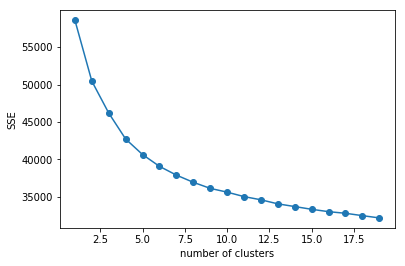

In [21]:
estimate_cluster=range(1,20)
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.plot(estimate_cluster,sse, 'o-')
plt.show()

In [17]:
k=10
km = KMeans(n_clusters=k, n_init=20, verbose=True, random_state=None, n_jobs=-1, ).fit(x)
colors=km.labels_*20

In [18]:
set(km.labels_)

array([2, 9, 9, ..., 9, 9, 9], dtype=int32)

t-SNE: 107.23 sec
t-SNE: 117.99 sec
t-SNE: 193.34 sec
t-SNE: 256.88 sec
t-SNE: 399.45 sec


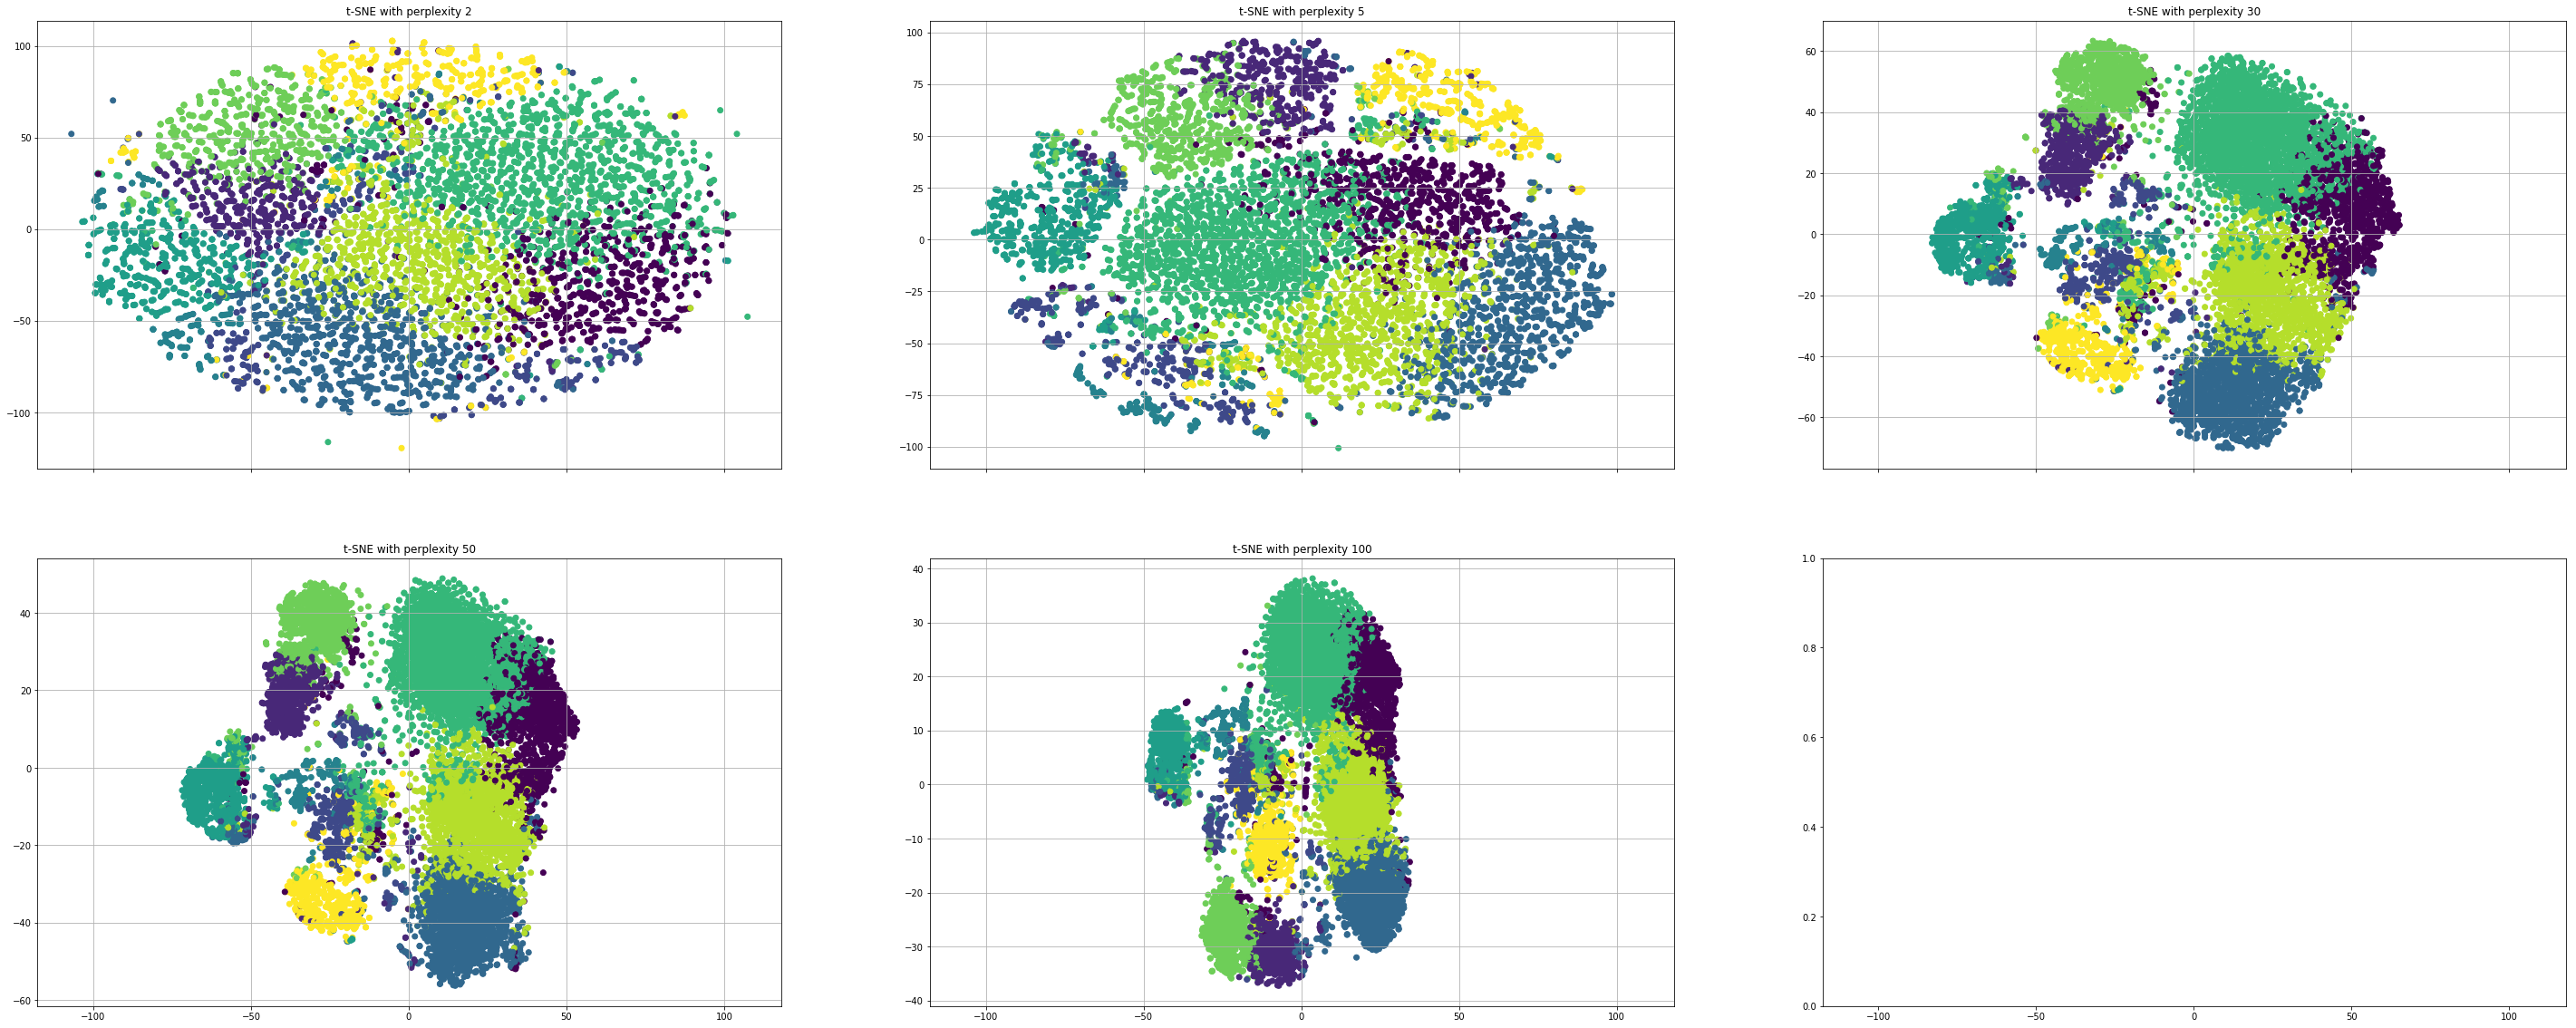

In [19]:
n_iter = 1000
fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(50,20))
titles = ['t-SNE with perplexity 2', 't-SNE with perplexity 5', 't-SNE with perplexity 30', 't-SNE with perplexity 50', 't-SNE with perplexity 100']
for ax, title, i in zip(axes.flat, titles, [2,5,30,50,100]):    
    t0 = time()
    model = TSNE(n_components=2, n_iter = n_iter, random_state=0, perplexity =i)
    Y = model.fit_transform(x)
    t1 =time()
    print( "t-SNE: %.2f sec" % (t1 -t0))
    ax.scatter(Y[:, 0], Y[:, 1], c=colors)
    ax.set_title(title)
    ax.grid(True)    
plt.show()

In [20]:
%%time
x=np.vstack(sample_desc)
x.shape
model1 = TSNE(n_components=3, n_iter = n_iter, random_state=0, perplexity = 50)
Y1 = model1.fit_transform(x)

CPU times: user 13min 21s, sys: 13.8 s, total: 13min 35s
Wall time: 13min 35s


In [ ]:
fig = plt.figure(1, figsize=(15, 7))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(Y1[:, 0], Y1[:, 1], Y1[:, 2], c= colors)
           #cmap=plt.cm.Paired)
ax.set_title("3D T-SNE - Perplexity = {}".format(100))
ax.set_xlabel("1st dim")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd dim")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd dim")
ax.w_zaxis.set_ticklabels([])
plt.show()

In [93]:
cluster_map = df[df['product_id'].isin(unique_id)]
cluster_map['cluster'] = km.labels_

/home/ubuntu/.virtualenvs/hana/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [106]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

In [115]:
cluster_map.shape

(1420, 7)

In [110]:
cluster_map[cluster_map['cluster']==0]['style'].value_counts()

gothic      12
punk        2 
bohemian    1 
classic     1 
glam        1 
edgy        1 
Name: style, dtype: int64

In [114]:
cluster_map[cluster_map['cluster']==4]['style'].value_counts()

edgy            6
romantic        6
minimalistic    5
gothic          4
classic         2
bohemian        1
active          1
glam            1
punk            1
Name: style, dtype: int64

In [108]:
cluster_map[cluster_map['cluster']==0]['comb_desc']

932864     green camouflage parka long sleeve distressed cotton canvas coat feature multicolor camouflage pattern conceal twoway zip closure button placket welt flap pocket waist multicolor embroider applique sleeve multicolor graphic print fully line silvertone hardware tonal stitching camo outerwear                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
934418     katy deep scoop tee loose comfy soft scoop neck tee quintessential everyday shirt pima cotton feature lengthen sleeve loose silhouette flatter midsection pima cotton soft lightw

In [140]:
## Import up sound alert dependencies
from IPython.display import Audio, display

def allDone():
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))
## Insert whatever audio file you want above
allDone()